# import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 예비학습

## 모티블 : 클래스를 매번 수정하기 불편해

## UPjump - Ver1

In [3]:
class UpJump:
    def __init__(self):
        self.value = 0
    def up(self):
        self.value = self.value + 1  
    def jump(self,jump_size):
        self.value = self.value + jump_size
    def __repr__(self):
        return str(self.value)        

In [4]:
a = UpJump()
a.jump(2)

In [5]:
a

2

## Upjump - Ver2

In [6]:
class UpJump_Ver2(UpJump):
    def jump(self,jump_size):
        self.value = self.value + jump_size

In [7]:
a = UpJump_Ver2()

In [8]:
a.jump(2)

In [9]:
a

2

## tip

`-` 클래스를 조금 수정하고 싶을때, 아래와 같은 문법을 이용하면 편리하다.

```python
class 새로운 클래스(수정할 클래스):
    def 수정 및 추가할 함수(self,parameter):
        return ...
```

`-` 사용에시

In [10]:
class temp(UpJump) :
      def __repr__(self) :
        return f"현재 value는 {self.value}입니다."

In [11]:
a = temp()

In [12]:
a.jump(50)

In [13]:
a

현재 value는 50입니다.

# 깨달음 6. `__add__`

## motive

1. 클래스를 배우기 전 : `int` 자료형의 `+`는 "**정수의 덧셈**"을 의미하고 `list`자료형의 `+`는 **"자료의 추가"** 를 의미한다.

2. 클래스를 배운 후 : 아마 int, list 클래스의 `+` 라는 연산을 정의하는 숨겨진 메소드가 있을 것이다.

In [14]:
a,b= 1,2

`-`  int  

In [15]:
print(f"a = {a}, b = {b}, a+b = {a+b}")
print(f"a = {a}, b = {b}, a.__add__(b) = {a.__add__(b)}")

a = 1, b = 2, a+b = 3
a = 1, b = 2, a.__add__(b) = 3


`-` list

In [16]:
a,b = [1,2],[3,4]

In [17]:
print(f"a = {a}, b = {b}, a+b = {a+b}")
print(f"a = {a}, b = {b}, a.__add__(b) = {a.__add__(b)}")

a = [1, 2], b = [3, 4], a+b = [1, 2, 3, 4]
a = [1, 2], b = [3, 4], a.__add__(b) = [1, 2, 3, 4]


`-` 확인 : `a+b`는 사실 내부적으로 `a.__add__(b)`의 축약구문이다.

`-` 추측 : 따라서 만약 : `a.__add__(b)`의 기능을 재정의 하면 `a+b`의 기능도 바뀔것이다.

## ex1. `__add__()`

`-` 클래스 선언

* 한 학기를 등록할 때마다. 학생의 나이가 0.5, 학기가 1 증가하는 `__add__` 함수를 클래스 내부에 구현

In [18]:
class s:
    def __init__(self, age=20.0, semester=0): 
        self.age = age
        self.semester = semester
        print(f"입학을 축하합니다. 당신의 나이는 {self.age}이고 현재 학기는 {self.semester}학기 입니다.")
    def __add__(self,registration_status):  
        if registration_status=='휴학': 
            self.age=self.age+0.5 
        elif registration_status=='등록':
            self.age=self.age+0.5 
            self.semester= self.semester+1
    def _repr_html_(self): ## 코드 출력 정의
        html_str = """
        나이: {} <br/>
        학기: {} <br/>
        """
        return html_str.format(self.age,self.semester)

In [19]:
gc = s()

입학을 축하합니다. 당신의 나이는 20.0이고 현재 학기는 0학기 입니다.


In [20]:
gc + "등록"

In [21]:
gc

In [22]:
gc + "휴학"

In [23]:
gc

## ex2. `__add__` + `return`

`-` 잘못된 사용

In [24]:
gc + '등록'+ '휴학' + '등록' + '휴학'

TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

`-` Ver 1

In [25]:
class s:
    def __init__(self, age=20.0, semester=0): 
        self.age = age
        self.semester = semester
        print(f"입학을 축하합니다. 당신의 나이는 {self.age}이고 현재 학기는 {self.semester}학기 입니다.")
    def __add__(self,registration_status):  
        if registration_status=='휴학': 
            self.age=self.age+0.5 
        elif registration_status=='등록':
            self.age=self.age+0.5 
            self.semester= self.semester+1 
        return self  ## return 추가
    def _repr_html_(self): ## 코드 출력 정의
        html_str = """
        나이: {} <br/>
        학기: {} <br/>
        """
        return html_str.format(self.age,self.semester)

In [26]:
gc = s()

입학을 축하합니다. 당신의 나이는 20.0이고 현재 학기는 0학기 입니다.


In [27]:
gc + '등록'+ '휴학' + '등록' + '휴학'

`-` Ver2

## ex2. `__add__` + `super`

In [28]:
class s_2(s):
    def __add__(self,registration_status): 
        if registration_status=='휴학': 
            self.age = self.age+0.5
        elif registration_status=='등록':
            self.age = self.age+0.5 
            self.semester = self.semester+1 
        return self

In [29]:
gc = s_2()

입학을 축하합니다. 당신의 나이는 20.0이고 현재 학기는 0학기 입니다.


In [30]:
gc + '등록'+ '휴학' + '등록' + '휴학'

***

# 깨달음 7. `__getitem__`

## motive

In [31]:
a = [1,2,3]
a

[1, 2, 3]

In [32]:
a[0]

1

In [33]:
a.__getitem__(0)

1

## ex1. RPS(가위바위보)

In [34]:
class RPS:
    def __init__(self,candidate):
        self.candidate = candidate
        self.actions = list() 
    def pick(self):
        self.actions.append(np.random.choice(self.candidate))        
    def _repr_html_(self):
        html_str = """
        낼 수 있는 패: {} <br/>
        기록: {}
        """        
        return html_str.format(self.candidate,self.actions)

In [36]:
a = RPS(["가위","바위","보"])

In [37]:
a.pick()
a.pick()

In [38]:
a.actions

['바위', '보']

In [39]:
a[0], a[1]

TypeError: 'RPS' object is not subscriptable

`-` 위를 에러가 나지않고  리스트처럼 인덱싱 했으면 좋겠음

## ex2. 리스트 인덱싱 기능 추가

In [40]:
class RPS_Ver2(RPS):
    def __getitem__(self,item):
        return self.actions[item]

In [41]:
a = RPS_Ver2(['가위','바위','보'])

In [42]:
a.pick()
a.pick()
a.pick()

In [43]:
a

In [44]:
a[0]

'가위'

***

# 깨달음 8. `__setitem__`

## motive

In [45]:
a = RPS_Ver2(['가위','바위'])
a

In [46]:
a.pick()
a.pick()
a

In [47]:
a[0]

'가위'

In [48]:
a[0] = '보' 

TypeError: 'RPS_Ver2' object does not support item assignment

`-` 만약 실수로 기록할 때와 같은 경우가 있을경우 위처럼 수정이 필요할 수도 있겠다.

`-` 리스트 예제 관찰

In [49]:
l = [1,2]
l

[1, 2]

In [50]:
l[0]=2

In [51]:
l

[2, 2]

In [52]:
l.__setitem__(0,1)

In [53]:
l

[1, 2]

## ex1. 값을 수정하는 메소드 구현

In [54]:
class RPS_Ver3(RPS_Ver2):
    def __setitem__(self,index,val):
        self.actions[index] = val

In [55]:
a=RPS_Ver3(['가위','바위','보'])

In [56]:
a.pick()

In [57]:
a

In [58]:
a[0] = "가위"

In [59]:
a

# 깨달음 9. `__len__`

`-` RPS를 몇번이나 했는지 알고 싶은 메소드도 구현하고 싶음

`-` 파이썬의 `len`은 `__len__`의 축약형이다.

In [60]:
class RPS_Ver4(RPS_Ver2):
    def __len__(self):
        return len(self.actions)

In [61]:
a = RPS_Ver4(['가위','바위','보'])
a

In [62]:
a.pick()
a.pick()
a.pick()
a.pick()

In [63]:
a

In [64]:
len(a)

4

***

# 깨달음 10. 비교 연산자

`-` 비교 연산자 정리

|특수 메소드| 의미|
|:---:|:---:|
|`__eq__`|`self == other`|
|`__gt__`|`self > other`|
|`__lt__`|`self < other`|
|`__ge__`|`self >= other`|
|`__le__`|`self <= other`|

## motive1

* `가위===가위`이면 `True`가 나왔으면 좋겠음.

### 관찰 : `__eq__`

In [65]:
a = 1
a

1

In [66]:
a==1

True

In [67]:
a.__eq__(1)

True

* `a==1`은 `a.__eq__(1)`의 축약버전이다.

### 구현 : `__eq__`

In [68]:
class RPS_Ver5(RPS_Ver4):
    def __eq__(self,other):
        return self[-1] == other[-1]

In [69]:
a = RPS_Ver5(['가위','바위'])
b = RPS_Ver5(['가위','바위'])

`-` 1회 대결

In [70]:
a.pick()
b.pick()

In [71]:
a

In [72]:
b

In [73]:
a == b

False

`-` 2회 대결

In [74]:
a.pick()
b.pick()

In [75]:
a == b

False

`-` 3회 대결

In [76]:
a.pick()
b.pick()

In [77]:
a == b

True

## motive2

In [80]:
a[-1], b[-1]

('가위', '가위')

In [81]:
a > b

TypeError: '>' not supported between instances of 'RPS_Ver5' and 'RPS_Ver5'

`-` 목표 : `False`가 나왔으면 좋겠음

### 관찰 : `__gt__`

In [90]:
a = 1
b = 2

In [92]:
a>1, a.__gt__(1), b>1, b.__gt__(1)

(False, False, True, True)

In [93]:
a.__gt__(1)

False

### 예비학습

In [96]:
a = RPS_Ver5(['가위','바위'])
b = RPS_Ver5(['가위','바위'])

In [97]:
for i in range(3) :
    a.pick()
    b.pick()

In [102]:
a

In [103]:
b

In [110]:
a[-1], b[-1]

('바위', '바위')

`-` 이기는 요소를 각 리스트 원소에 왼쪽에 배치

In [111]:
[a[-1],b[-1]] in [['가위','보'],['바위','가위'],['보','바위']]

False

### 구현 : `__gt__`

In [113]:
class RPS_Ver6(RPS_Ver5):
    def __gt__(self,other):
        return [self[-1],other[-1]] in [['가위','보'],['바위','가위'],['보','바위']]

In [116]:
a = RPS_Ver6(['가위','바위','보'])
b = RPS_Ver6(['가위','바위','보'])

`-` 1회 대결

In [117]:
a.pick()
b.pick()

In [121]:
a[-1],b[-1]

('바위', '가위')

In [123]:
a>b

True

`-` 2회 대결

In [124]:
a.pick()
b.pick()

In [125]:
a[-1],b[-1]

('바위', '바위')

In [126]:
a>b

False

## motive3

In [127]:
a

In [129]:
b

`-` True로 나왔으면 좋겠음

In [130]:
a>=b

TypeError: '>=' not supported between instances of 'RPS_Ver6' and 'RPS_Ver6'

### 구현

`-` 비교 연산자 정리

|특수 메소드| 의미|
|:---:|:---:|
|`__eq__`|`self == other`|
|`__gt__`|`self > other`|
|`__lt__`|`self < other`|
|`__ge__`|`self >= other`|
|`__le__`|`self <= other`|

In [131]:
class RPS_Ver7(RPS_Ver6):
    def __ge__(self,other):
        return (self == other) or (self > other)
    def __lt__(self,other):
        return not (self >= other)
    def __le__(self,other):
        return (self == other) or (self < other)

In [132]:
a = RPS_Ver7(['가위','바위','보'])
b = RPS_Ver7(['가위','바위','보'])

In [133]:
a.pick()
b.pick()

In [134]:
a

In [135]:
b

In [136]:
a==b, a>b, a<b, a>=b, a<=b 

(True, False, False, True, True)

# 깨달음 11. `__call__` ($\star\star\star$)

## 함수

In [137]:
def f() :
    return "test"

In [139]:
f()

'test'

In [141]:
?f

Signature: f()
Docstring: <no docstring>
File:      c:\users\user\appdata\local\temp\ipykernel_12160\3092864090.py
Type:      function

`-` 함수 f의 type은 `function`이다.

`-` 즉, 우리가 만든 f는 `function`이라는 클래스의 오브젝트에 불과하다.

## ex1)  $(x-a)^2$

### 풀이 1. 중첩

In [142]:
def f(a) :
    def _f(x) :
        return (x-a)**2
    return _f

In [149]:
g = f(10)

In [150]:
g(2)

64

### 풀이 2. lambda

In [152]:
def f(a) :
    _f = lambda x : (x-a)**2
    return _f

In [153]:
g = f(10)

In [155]:
g(2)

64

## ex2) $f\prime(x)$

### 풀이 1. 기본 함수

In [195]:
def f(x): 
    return x**2 

In [198]:
def d(f,x): 
    h=0.000000000001
    return (f(x+h)-f(x))/h 

In [197]:
d(f,4) # f'(4) = 2*4 = 8

8.000711204658728

### 풀이 2. 함수 중첩

In [201]:
def f(x): 
    return x**2 

In [200]:
def d(f): 
    def df(x):  
        h=0.000000000001
        return (f(x+h)-f(x))/h 
    return df

In [202]:
ff = d(f)

In [204]:
ff(4)

8.000711204658728

### 풀이3. lambda

In [228]:
def f(x): 
    return x**2 

In [237]:
def dl(f) :
    h=0.000000000001
    return lambda x :  (f(x+h)-f(x))/h

In [238]:
dd = dl(f)

In [239]:
dd(4)

8.000711204658728

### 시각화

In [209]:
x = np.linspace(-1,1,100)

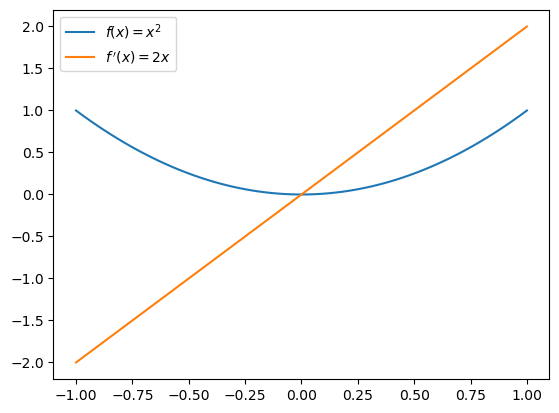

In [220]:
plt.plot(x,f(x),label = r"$f(x)=x^2$")
plt.plot(x,ff(x),label = r"$f^{\,\prime}(x)=2x$")
plt.legend()

## ex3) 함수들의 리스트

In [276]:
flst = [lambda x: x, lambda x: x**2, lambda x: x**3] 
flst

[<function __main__.<lambda>(x)>,
 <function __main__.<lambda>(x)>,
 <function __main__.<lambda>(x)>]

In [278]:
for f in flst : 
    print(f(2))

2
4
8


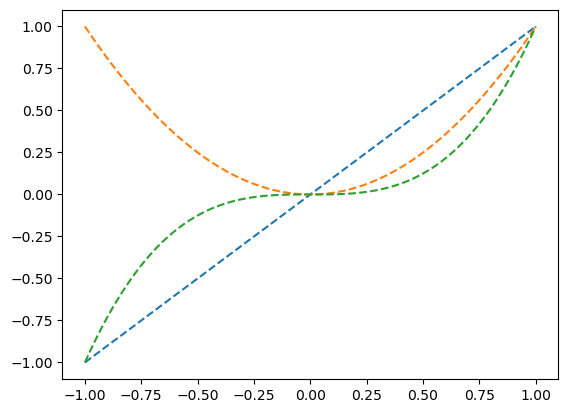

In [294]:
for f in flst : 
    plt.plot(x,f(x),"--")

## `__call__`

In [298]:
f = lambda x : x+1

In [299]:
f(3)

4

In [300]:
f.__call__(3)

4

* `f(3)`은 `f__call__(3)`의 축약버전이다.

### 관찰

`-` 함수처럼 쓸 수없는 인스턴스는 단지 `__call__`이 없을뿐이다. $\to$ 'A' object is not callable

In [302]:
class A():
    def __init__(self) :
        self.n = "강철"

In [304]:
a = A()

In [305]:
a()

TypeError: 'A' object is not callable

`-` 위 코드 수정

In [306]:
class A2(A):
    def __call__(self) :
        print(self.n)

In [307]:
a = A2()

In [308]:
a()

강철


## 구현 : self.상수 + 상수

In [309]:
class add1:
    def __init__(self,c) :
        self.c = c
    def __call__(self,x) :
        return self.c + x

In [310]:
a = add1(3)

In [314]:
a(5)

8

In [315]:
a(10)

13

***

# 깨달음 12. `__iter__`($\star\star$)

## 관찰 1. iter

`-` 아래 `???`의 자리에 올수 있는것은 `dir(?)`하여 `set(dir(lst)) & {'__iter__'}` 가 있는 오브젝트이다

```python
for i in ???:
    print(i)
```

In [317]:
lst = [1,2,3]

In [321]:
lst = [1,2,3]
set(dir(lst)) & {'__iter__'}

{'__iter__'}

In [322]:
tpl = 1,2,3
set(dir(tpl)) & {'__iter__'}

{'__iter__'}

In [323]:
string = '123'
set(dir(string)) & {'__iter__'}

{'__iter__'}

In [324]:
a = 5
set(dir(a)) & {'__iter__'}

set()

## 관찰2. next

* `__next__`의 기능은 $\to$ iterable 객체들의 원소들을 차례대로 꺼내준다 

* 더이상 꺼낼 원소가 없으면 `Stopiteration Error`를 발생시킴

In [329]:
lst = [1,2,3].__iter__()

In [330]:
next(lst)

1

In [331]:
next(lst)

2

In [332]:
next(lst)

3

`-` 원소가 3개이기 때문에 3번이상 명령어 입력시 에러 발생

In [333]:
next(lst)

StopIteration: 

## 관찰 3. 데이터 프레임

In [335]:
df = pd.DataFrame({'x':[1,2,3],'y':[2,3,4]})
df

,x,y
0,1,2
1,2,3
2,3,4


In [339]:
set(dir(df)) & {'__iter__'}

{'__iter__'}

`-` 데이터 프레임의 경우는 루프문 수행 시 컬럼 네임을 출력해준다.

In [340]:
for i in df :
    print(i)

x
y


`-` next 함수 적용

In [341]:
_df = iter(df)

In [342]:
next(_df)

'x'

In [343]:
next(_df)

'y'

`-` 컬럼이 2개 밖에 없어 에러 발생

In [344]:
next(_df)

StopIteration: 

## 구현

`-` 가찌를 내는 순간 for문이 멈추도록 하는 이터레이터를 만들자

In [354]:
class RPS_ITERATOR: # 찌를 내는순간 for문이 멈추도록 하는 이터레이터를 만들자
    def __init__(self): 
        self.candidate = ["묵","찌","빠"] 
    def __iter__(self):
        return self 
    def __next__(self):
        action = np.random.choice(self.candidate) ## 묵찌빠에서 랜덤 선택
        if action == "찌":
            print("찌가 나와서 for문을 멈춥니다")
            raise StopIteration
        else:
            return action

In [350]:
a = RPS_ITERATOR()

In [351]:
next(a)

찌가 나와서 for문을 멈춥니다


StopIteration: 

In [352]:
next(a)

'묵'

In [353]:
next(a)

'빠'

In [357]:
for i in a :
    print (i)

묵
빠
빠
빠
찌가 나와서 for문을 멈춥니다


## range (생략)

## zip

`-` 이터레이터엔 개념을 알면 for문에 대한 이해도가 대폭 상승한다.

### 관찰 1. zip?

`-` 일단 zip으로 만든 객체가 `iterable object`인지 확인하자

In [360]:
temp = zip([1,2,3],"abc")

In [362]:
temp

In [361]:
set(dir(temp)) & {"__iter__","__next__"}

{'__iter__', '__next__'}

`-` 오 2가지 다있는 것을 보니 `temp`는 iterable 오브젝트이다.

In [363]:
next(temp)

(1, 'a')

In [364]:
next(temp)

(2, 'b')

In [365]:
next(temp)

(3, 'c')

`-` 훗, 무슨 느낌인지 알겠음

In [366]:
next(temp)

StopIteration: 

### 관찰 2. 그래서 뭐하는 문법인가?

In [367]:
zip?

Init signature: zip(self, /, *args, **kwargs)
Docstring:     
zip(*iterables, strict=False) --> Yield tuples until an input is exhausted.

   >>> list(zip('abcdefg', range(3), range(4)))
   [('a', 0, 0), ('b', 1, 1), ('c', 2, 2)]

The zip object yields n-length tuples, where n is the number of iterables
passed as positional arguments to zip().  The i-th element in every tuple
comes from the i-th iterable argument to zip().  This continues until the
shortest argument is exhausted.

If strict is true and one of the arguments is exhausted before the others,
raise a ValueError.
Type:           type
Subclasses:     

`-` 음, 위에 나온 예제를 싱행해보니 무슨 느낌인지 알겠음

In [368]:
list(zip('abcdefg', range(3), range(4)))

[('a', 0, 0), ('b', 1, 1), ('c', 2, 2)]

### 관찰 3. enumerate

`-` 이녀석도 이터러블 객체이다.

In [369]:
set(dir(enumerate('abc'))) & {'__iter__', '__next__'}

{'__iter__', '__next__'}

`-` enumerate는 원소와 인덱스를 반환해준다.

In [370]:
for i in enumerate(list("abc")) :
    print(i)

(0, 'a')
(1, 'b')
(2, 'c')


## summary

`-`  for문을 사용하려면 **"iterable object"** 여야만 한다.